# 1 了解数据的基本统计信息
Kaggle：House Prices: Advanced Regression Techniques 数据预处理 - 未雨愁眸 - 博客园  https://www.cnblogs.com/mtcnn/p/9411606.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
df_train = pd.read_csv(r"house_price_data\train.csv")


# 1.1 查看基本信息

In [3]:
df_train.columns #查看 特征列名
df_train.shape   #查看 行列数目
df_train.describe()  #查看基本统计

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

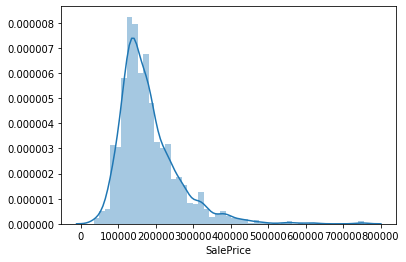

In [5]:
sns.distplot(df_train['SalePrice']);

In [6]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


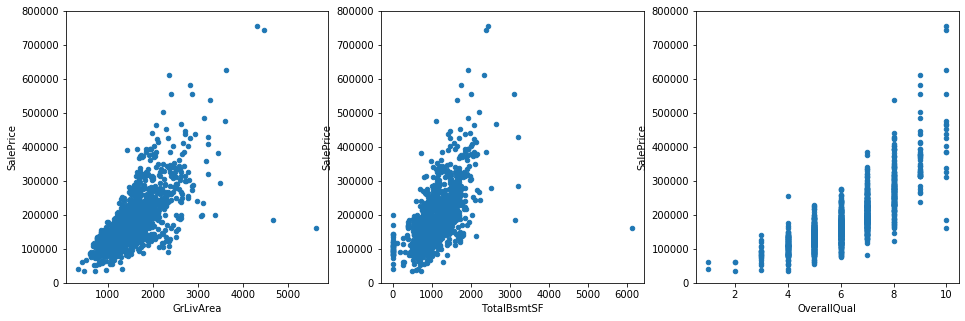

In [7]:
output,var,var1,var2 = 'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual'
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_train.plot.scatter(x=var,y=output,ylim=(0,800000),ax=axes[0])
df_train.plot.scatter(x=var1,y=output,ylim=(0,800000),ax=axes[1])
df_train.plot.scatter(x=var2,y=output,ylim=(0,800000),ax=axes[2])

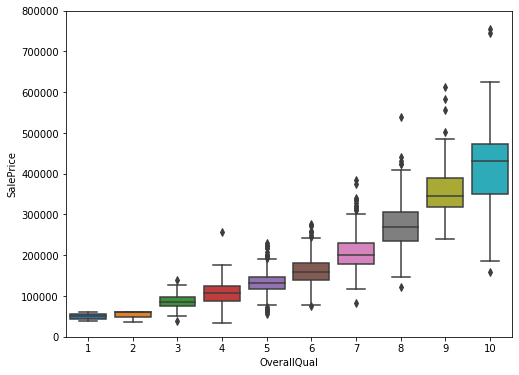

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=var2,y=output,data=df_train)
ax.set_ylim(0,800000)
plt.show()

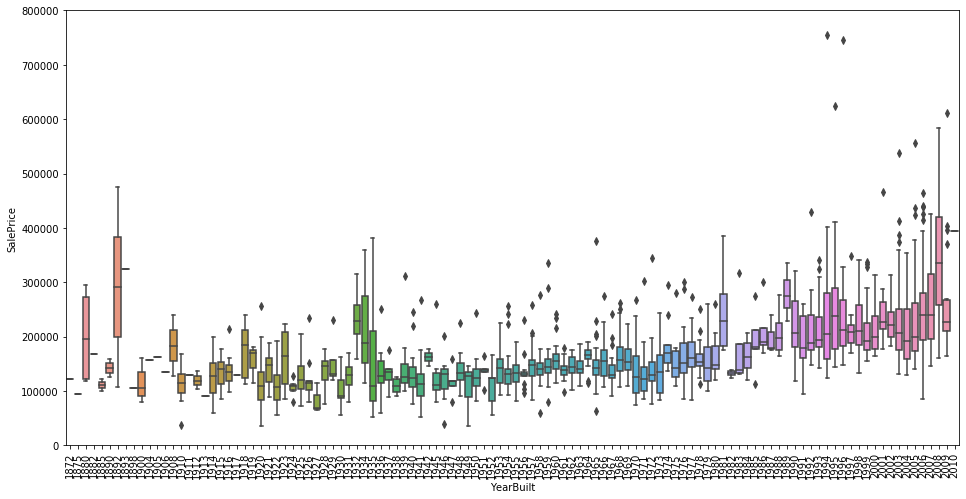

In [9]:
var3 = 'YearBuilt'
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x=var3,y=output,data=df_train)
ax.set_ylim(0,800000)
plt.xticks(rotation=90)
plt.show()

通过散点图和箱型图我们发现‘GrLivArea’和‘TotalBsmtSF’似乎和‘SalePrice’是线性关系，而‘OverallQual’和‘YearBulit’似乎也和‘SalePrice’有关。

# 1.3.4 特征协方差矩阵热图展示

直接获得整个DataFrame数据的协方差矩阵并利用热图分析：

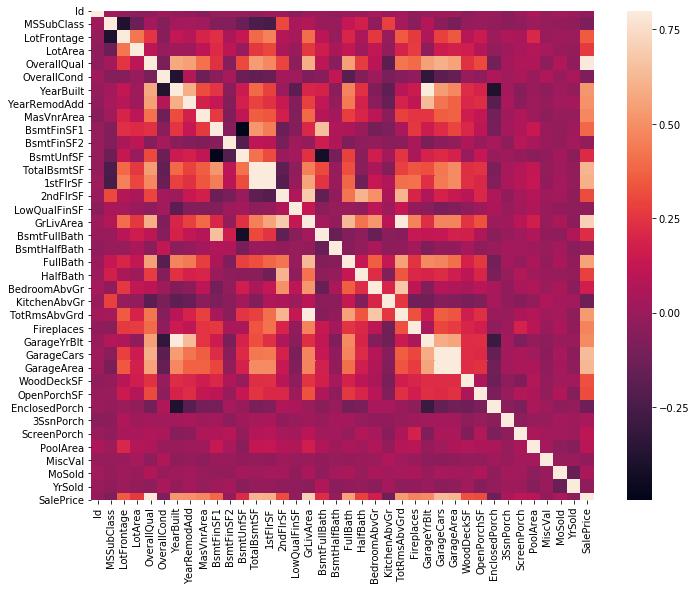

In [10]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, ax=ax)  # square参数保证corrmat为非方阵时，图形整体输出仍为正方形
plt.show()

然后我们可以选出与 ‘SalePrice’相关系数最高的10个特征查看其相关情况

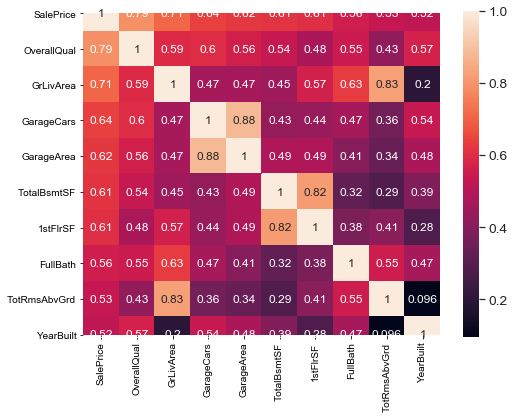

In [11]:
k = 10
top10_attr = corrmat.nlargest(k, output).index
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig,ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.25)
sns.heatmap(top10_mat, annot=True, annot_kws={'size':12}, square=True)
# 设置annot使其在小格内显示数字，annot_kws调整数字格式
plt.show()

可以发现，

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' 和'SalePrice'具有较强的相关性；
- 'GarageCars' 和 'GarageArea'也和'SalePrice'具有较强的相关性，但是这两个特征本身具有相关性，所以保留一个较高的相关系数的特征即可，同理保留'TotalBsmtSF' ，舍弃 '1stFloor' ，'TotRmsAbvGrd' 因为和'GrLivArea'相关所以舍弃；
- 保留'FullBath'和'YearBuilt'

# 1.3.5 散点图和箱型图结合的图矩阵

seaborn 还可以对多个特征的散点图及直方图信息进行整合，得到各个特征两个组合形成的图矩阵

将保留下来的特征作图如下：

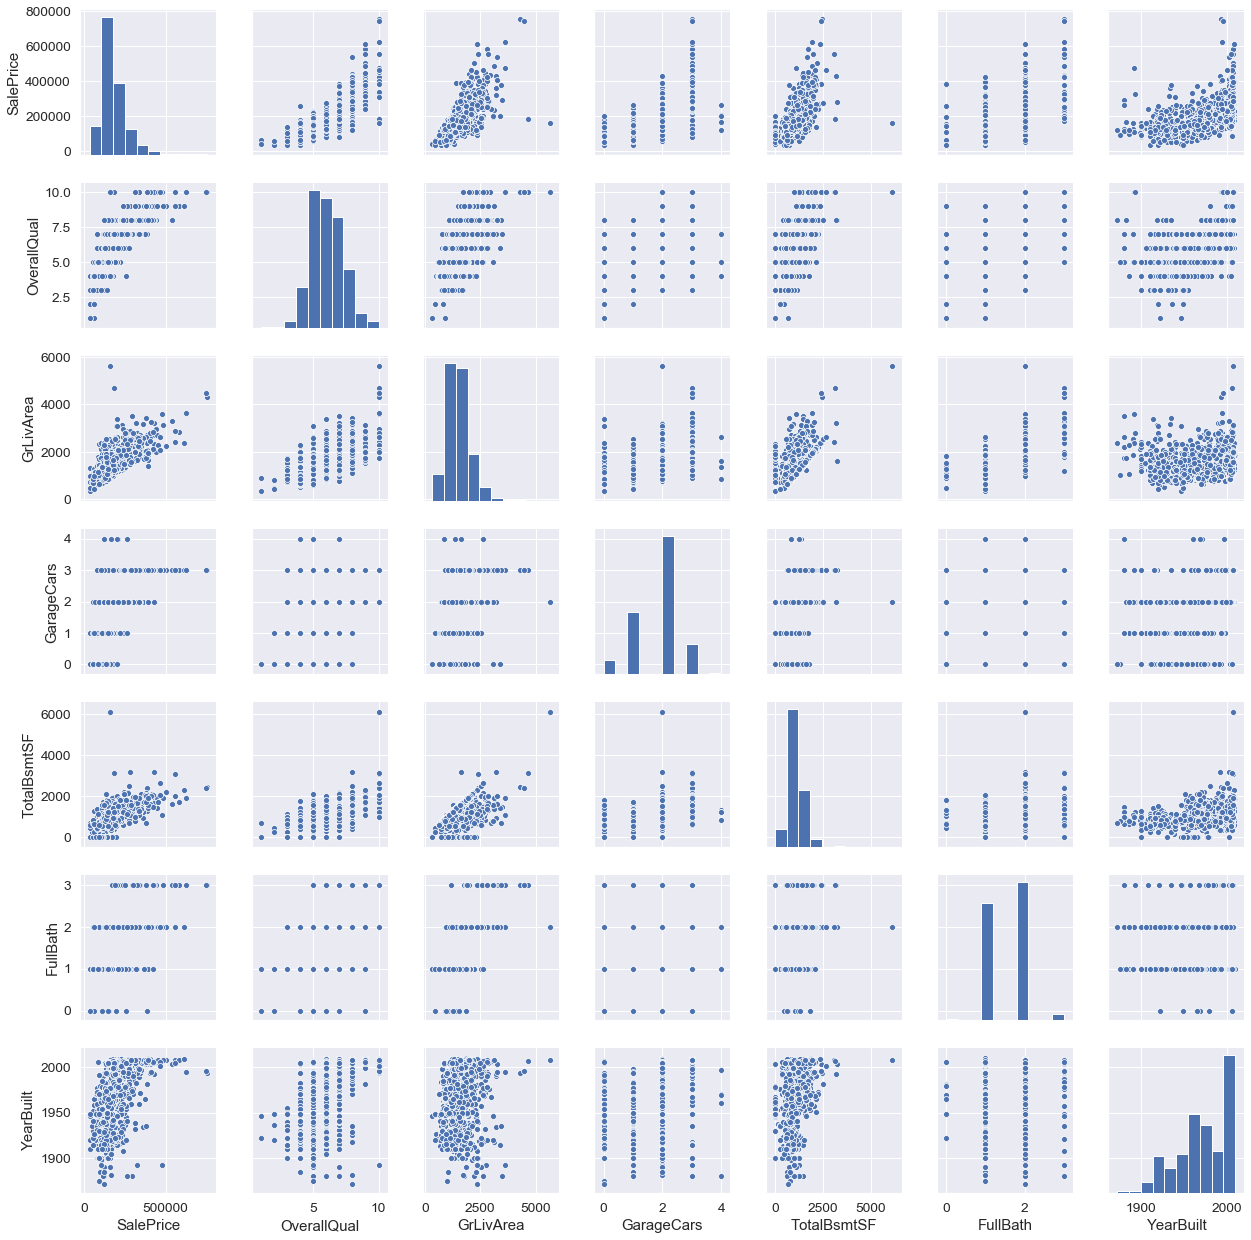

In [14]:
var_set = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set(font_scale=1.25)  # 设置横纵坐标轴的字体大小
sns.pairplot(df_train[var_set])  # 7*7图矩阵
# 可在kind和diag_kind参数下设置不同的显示类型，此处分别为散点图和直方图，还可以设置每个图内的不同类型的显示
plt.show()

# 2 缺失值处理

缺失值处理有两种方案，一种是分析含缺失值的特征对任务有没有用，没用的特征直接删除，有用的特征依据缺失量，少则删除样本，多则用mean,median或mod补全；另一种方案是分析这些缺失值缺失的原因，并用一定方法将其转换为一类数据（成为类型变量的一个类型）。

重新导入数据：

In [15]:
df_train = pd.read_csv(r"house_price_data\train.csv")

In [16]:
na_count = df_train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df_train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])

首先，如果某一特征的数据缺失量达到15%以上，那这项特征应该予以删除并认为数据集中不存在这样的特征（也就是说我们并不会设法去填补这些特征的缺失值，因为假定它是不存在的），因此删除数据的’PoolQC’, ‘MiscFeature’, ‘Alley’这几列（这应该不会导致数据的有效信息量下降，因为这些特征的字面含义似乎根本与房价无关，难怪会有这么多缺失值XD，而且这些特征的有效数据具有各种离群值）。

然后，在剩下的含缺失值变量中，以Garage开头的5个GarageX特征具有相同数量的缺失值，据此推测他们可能代表的是同一组观测值，而关于Garage的信息，’GarageCars’已经能够很好地表征了，因此删除这几个特征，对BsmtX也可以进行同样的操作。

对于MasVnrArea和MasVnrType，根据其字面意思我们认为它们并不重要，而且它们与YearBuilt和OverallQual有较强的相关性。因此，我们删除这两个特征也不会丢失任何信息。

总的来看，除了Electrical，其他含缺失值的变量我们都已经删除了，Electrical这个变量下只有一个样本带有缺失值，因此我们不妨删除带有这个缺失值的那各样本。

In [17]:
df_train = df_train.drop(na_data[na_data['count']>1].index, axis=1)  # 删除上述前18个特征 
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)  # 删除 Electrical 取值丢失的样本
df_train.shape  # 缺失值处理后的数据大小：1459个样本，63个特征

(1459, 63)

2.2 缺失值补全与变换
2.2.1 数值填充

In [20]:
df_tr = df_train.drop('Id',axis=1)
df_X = df_tr.drop('SalePrice',axis=1)
df_y = df_tr['SalePrice']
quantity = [attr for attr in df_X.columns if df_X.dtypes[attr] != 'object']  # 数值变量集合
quality = [attr for attr in df_X.columns if df_X.dtypes[attr] == 'object']  # 类型变量集合

for c in quality:  # 类型变量缺失值补全
    df_tr[c] = df_tr[c].astype('category')
    if df_tr[c].isnull().any():
        df_tr[c] = df_tr[c].cat.add_categories(['MISSING'])
        df_tr[c] = df_tr[c].fillna('MISSING')

# 连续变量缺失值补全 
quantity_miss_cal = df_tr[quantity].isnull().sum().sort_values(ascending=False)  # 缺失量均在总数据量的10%以下
missing_cols = quantity_miss_cal[quantity_miss_cal>0].index
df_tr[missing_cols] = df_tr[missing_cols].fillna(0.)  # 从这些变量的意义来看，缺失值很可能是取 0
df_tr[missing_cols].isnull().sum()  # 验证缺失值是否都已补全

Series([], dtype: float64)

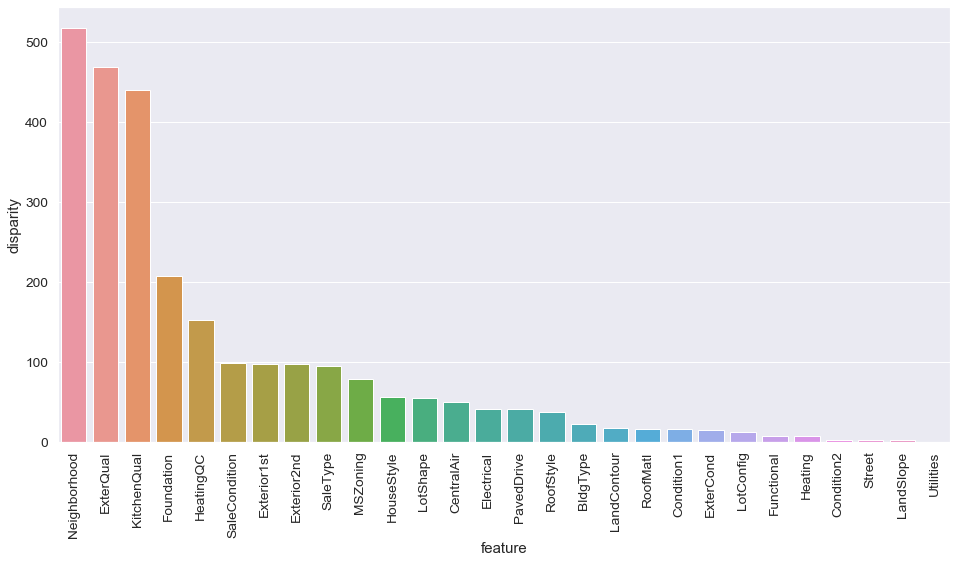

In [21]:
# 一元方差分析（类型变量）
def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)  # 某特征下不同取值对应的房价组合形成二维列表
        pval = stats.f_oneway(*samples)[1]  # 一元方差分析得到 F，P，要的是 P，P越小，对方差的影响越大。
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_tr,quality)
a['disparity'] = np.log(1./a['pval'].values)  # 悬殊度
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.show()

由上图示分析可见，不少离散变量的具体取值对最终房价会产生较大影响（例如Neighborhood这个变量，实际上暗含了地段这个影响房价的重要因素），因此，我们可以按照各离散变量相应取值下房价的均值来给各个取值划定一个1,2,3,4来定量描述他们对房价的影响，也就是将离散变量转化为数值型的有序变量：

In [22]:
def encode(frame, feature):
    '''
    对所有类型变量，依照各个类型变量的不同取值对应的样本集内房价的均值，按照房价均值高低
    对此变量的当前取值确定其相对数值1,2,3,4等等，相当于对类型变量赋值使其成为连续变量。
    '''
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['price_mean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    # 上述 groupby()操作可以将某一feature下同一取值的数据整个到一起，结合mean()可以直接得到该特征不同取值的房价均值
    ordering = ordering.sort_values('price_mean')
    ordering['order'] = range(1, ordering.shape[0]+1)
    ordering = ordering['order'].to_dict()
    for attr_v, score in ordering.items():
        # e.g. qualitative[2]: {'Grvl': 1, 'MISSING': 3, 'Pave': 2}
        frame.loc[frame[feature] == attr_v, feature+'_E'] = score
quality_encoded = []
# 由于qualitative集合中包含了非数值型变量和伪数值型变量（多为评分、等级等，其取值为1,2,3,4等等）两类
# 因此只需要对非数值型变量进行encode()处理。
# 如果采用One-Hot编码，则整个qualitative的特征都要进行pd.get_dummies()处理
for q in quality:
    encode(df_tr, q)
    quality_encoded.append(q+'_E')
df_tr.drop(quality, axis=1, inplace=True)  # 离散变量已经有了编码后的新变量，因此删去原变量

# 3 特征互相关分析与特征选取
## 3.1 有序变量相关性
对于有序变量，不能采用常规的相关系数进行计算，而应该采用斯皮尔曼等级相关系数，它不但能处理一般的连续性变量，同时还能很好地表征顺序变量的相关性。

下面先分析各特征与房价的相关性：

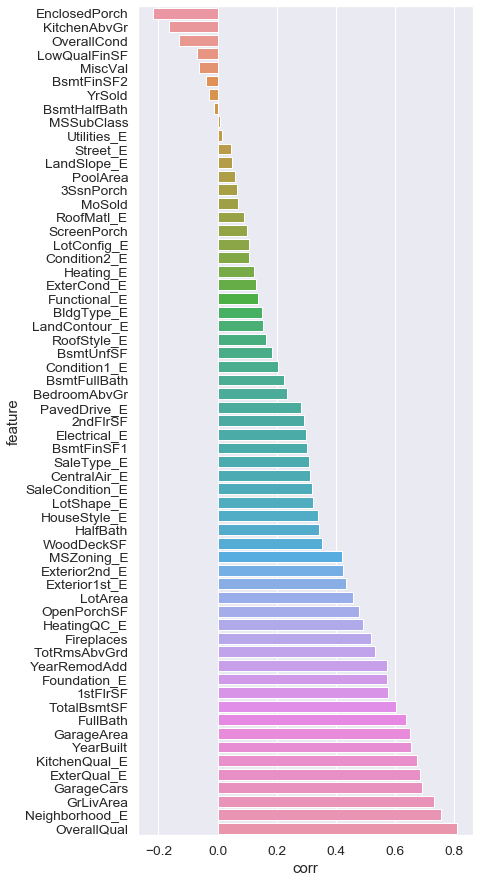

In [23]:
def spearman(frame, features):
    '''
    此相关系数简单来说，可以对上述encoder()处理后的等级变量及其它与房价的相关性进行更好的评价（特别是对于非线性关系）
    '''
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['corr'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('corr')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='corr', orient='h')    
features = quantity + quality_encoded
spearman(df_tr, features)

由上图可见，'OverallQual'，'Neighborhood_E'等参数与房价呈正相关，而'EnclosedPorch'等参数与房价呈负相关，这些重要的特征在特征选取时应予以保留。